In [2]:
import sys
import os
home=os.getcwd()
sys.path.append(home+'/Functions')
from ChargeDataSet import *
from MS_L_IDs import *
from ShowDF import *
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
from AllMS2Data import *
from ms2_spectrum import *
from Cosine_2Spectra import *
from PlotSpec import *
from All_ms2_spectra import *
from Retrieve_csv_ms2Spectra import *
from Similarity_AdjacencyMatrix import *
from AdjacencyList_from_matrix import *
from ms2_feat_modules import *
from MS_L_IDs import *
#from ms2_SpectralRendundancy import *
from feat_ms2_Gauss import *

# Load data and retrieve metadata

In [3]:
DataSetName='13211.mzML'
DataSet=ChargeDataSet(DataSetName)

In [46]:
help(DataSet[1234])

Help on MSSpectrum object:

class MSSpectrum(builtins.object)
 |  Cython implementation of _MSSpectrum
 |  
 |  Documentation is available at http://www.openms.de/current_doxygen/html/classOpenMS_1_1MSSpectrum.html
 |   -- Inherits from ['SpectrumSettings', 'RangeManager1']
 |  
 |  The representation of a 1D spectrum.
 |  Raw data access is proved by `get_peaks` and `set_peaks`, which yields numpy arrays
 |  Iterations yields access to underlying peak objects but is slower
 |  Extra data arrays can be accessed through getFloatDataArrays / getIntegerDataArrays / getStringDataArrays
 |  See help(SpectrumSettings) for information about meta-information
 |  -----
 |  Usage:
 |  ms_level = spectrum.getMSLevel()
 |  rt = spectrum.getRT()
 |  mz, intensities = spectrum.get_peaks()
 |  -----
 |  
 |  Methods defined here:
 |  
 |  __copy__(...)
 |  
 |  __deepcopy__(...)
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |

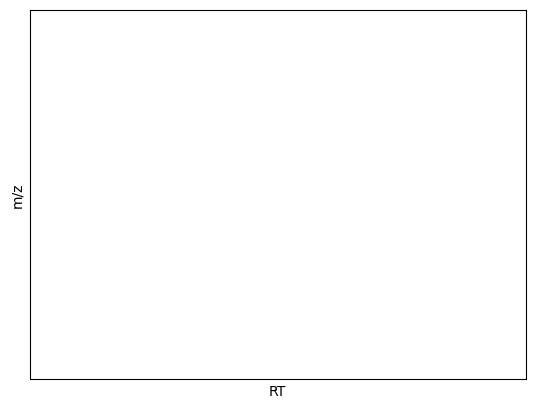

In [76]:

FirstSpec=True
for spectrum_id in np.arange(1210,2050,dtype='int'):
    spectrum=DataSet[int(spectrum_id)]
    ML=spectrum.getMSLevel()
    if ML==1:        
        Spec=np.array(spectrum.get_peaks()).T
        RTVec=spectrum.getRT()*np.ones_like(Spec[:,0]).reshape(-1,1)
        Spec=np.append(Spec,RTVec,axis=1)
        if FirstSpec:
            AllSpec=Spec
            FirstSpec=False
        else:
            AllSpec=np.append(AllSpec,Spec,axis=0)
        #plt.plot(RTVec,Spec[:,0],'k.',ms=0.5)
    

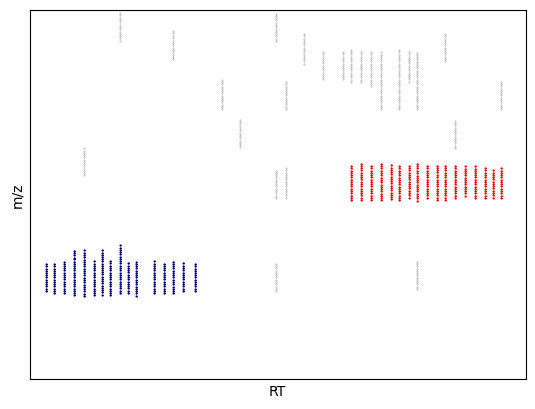

In [96]:
plt.ylim([256,256.2])
plt.xlim([135,152.5])

plt.xticks([])
plt.yticks([])
plt.xlabel('RT')
plt.ylabel('m/z')
plt.plot(AllSpec[:,2],AllSpec[:,0],'k.',ms=0.5,alpha=0.5)
Clus1Loc=(AllSpec[:,2]<142)&(AllSpec[:,2]>135)&(AllSpec[:,0]>256.025)&(AllSpec[:,0]<256.075)
plt.plot(AllSpec[Clus1Loc,2],AllSpec[Clus1Loc,0],'<',color='navy',ms=0.8)
Clus2Loc=(AllSpec[:,2]<152)&(AllSpec[:,2]>146)&(AllSpec[:,0]>256.08)&(AllSpec[:,0]<256.125)
plt.plot(AllSpec[Clus2Loc,2],AllSpec[Clus2Loc,0],'<',color='red',ms=0.8)

In [98]:
from mz_Gauss_std import *
mz,mz_std,b,r,I_total=mz_Gauss_std(Spec[SplotFil,:])
mz=np.sum(Spec[SplotFil,0]*Spec[SplotFil,1])/np.sum(Spec[SplotFil,1])
mz_vec=np.linspace(239.13,239.165,500)
IntVec=GaussianPeak(mz_vec,mz,mz_std,I_total)

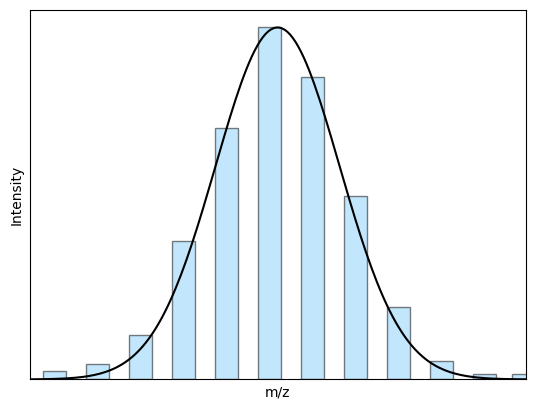

In [99]:
Spec=np.array(DataSet[1234].get_peaks()).T
SplotFil=(Spec[:,0]>239.13)&(Spec[:,0]<239.165)
plt.xlim([mz-4*mz_std,mz+4*mz_std])
plt.bar(Spec[SplotFil,0],Spec[SplotFil,1],width=0.0006,edgecolor='k',facecolor='lightskyblue',alpha=0.5)
plt.plot(mz_vec,IntVec,'k')
plt.xticks([])
plt.yticks([])
plt.xlabel('m/z')
plt.ylabel('Intensity')
plt.show()

### ms1 spectra id and its RT

In [4]:
MS1IDVec=MS_L_IDs(DataSet=DataSet,Level=1,min_RT=0,max_RT=1500)
ShowDF(MS1IDVec[:3])

,0,1
0,0,0.187298
1,1,0.328658
2,2,0.467812


### ms2 mz_precursor, RT, spectra id, most intense signal, most intense signal as a fraction

In [5]:
SummMS2_raw=AllMS2Data(DataSet=DataSet,min_RT=0,max_RT=1500,min_mz=100,max_mz=120) 
print(len(SummMS2_raw))
ShowDF(SummMS2_raw[:3])

293


,0,1,2,3,4
0,100.076,83.3423,948,109055,0.0832786
1,100.076,23.969,265,109290,0.113343
2,100.112,111.27,1323,153910,0.0838801


# Peak findind in all ms2